In [1]:
import numpy as np
import matplotlib.pyplot as plt

from collections import namedtuple

In [2]:
s1 = ('John', 'Smith', 30)
s2 = ('Thomas', 'Red', 18)

In [3]:
s1[2]

30

In [4]:
s1[1]

'Smith'

In [5]:
Student = namedtuple('Student', ['name', 'surname', 'mark'])

In [6]:
s1 = Student('John', 'Smith', 30)

In [7]:
s1.surname

'Smith'

In [8]:
Circle = namedtuple('Circle', ['cx', 'cy', 'r'])
my_circle = Circle(0, 0, 7)

In [9]:
my_circle.r

7

In [10]:
ApproximationOperator = namedtuple('ApproximationOperator', ['q', 'x', 'M'])

In [11]:
def build_lagrangian_basis(q, x):
    """
    This function takes two 1D numpy array, q and x, and returns
    a matrix M such that M[i, j] is the evaluation of the polynomial
    ell_i on the point x_j
    """
    n_nodes = q.shape[0]
    n_evaluation_points = x.shape[0]
    
    M = np.zeros((n_evaluation_points, n_nodes), dtype=np.float64)
    
    for i in range(n_evaluation_points):
        for j in range(n_nodes):
            M[i ,j] = 1
            for k in range(n_nodes):
                if j == k:
                    continue
                M[i, j] = M[i, j] * (x[i] - q[k]) / (q[j] - q[k])
    return M
    

In [12]:
def build_equispace_interpolator(n_nodes, x):
    """
    Build the operator that interpolate a function on [0, 1]
    using n_nodes equally spaced nodes
    """
    q = np.linspace(0, 1, n_nodes)
    M = build_lagrangian_basis(q, x)
    return ApproximationOperator(q, x, M)

In [13]:
build_equispace_interpolator(3, np.linspace(0, 1, 10))

ApproximationOperator(q=array([0. , 0.5, 1. ]), x=array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]), M=array([[ 1.        ,  0.        , -0.        ],
       [ 0.69135802,  0.39506173, -0.08641975],
       [ 0.43209877,  0.69135802, -0.12345679],
       [ 0.22222222,  0.88888889, -0.11111111],
       [ 0.0617284 ,  0.98765432, -0.04938272],
       [-0.04938272,  0.98765432,  0.0617284 ],
       [-0.11111111,  0.88888889,  0.22222222],
       [-0.12345679,  0.69135802,  0.43209877],
       [-0.08641975,  0.39506173,  0.69135802],
       [ 0.        , -0.        ,  1.        ]]))

In [14]:
def f1(x):
    return np.sin(np.pi * x)

In [15]:
evaluation_points = np.linspace(0, 1, 257)

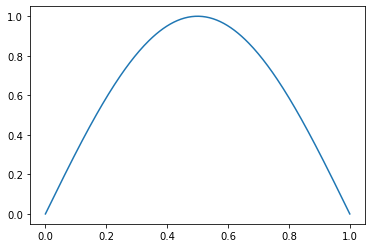

In [16]:
plt.plot(evaluation_points, f1(evaluation_points))

In [17]:
I_4 = build_equispace_interpolator(4, evaluation_points)

In [18]:
evaluation_of_interpolation = I_4.M @ f1(I_4.q)    # I_4.M.dot(f1(I_4.q))

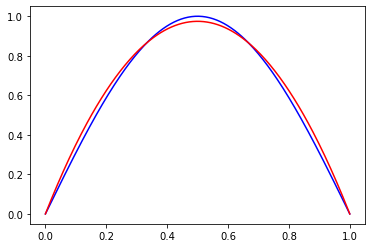

In [19]:
plt.plot(evaluation_points, f1(evaluation_points), color="blue")
plt.plot(evaluation_points, evaluation_of_interpolation, color="red")

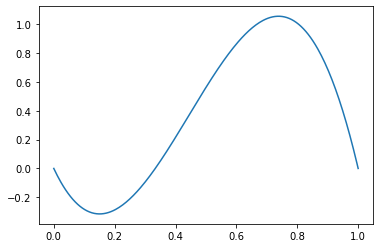

In [20]:
plt.plot(evaluation_points, I_4.M[:, 2])

In [21]:
def test_interpolation_on_sin(n_nodes, x):
    operator = build_equispace_interpolator(n_nodes, x)
    f_q = f1(operator.q)
    f_x = f1(x)
    I_f_x = operator.M @ f_q
    plt.plot(x, f_x, linestyle='--')
    plt.plot(x, I_f_x)
    plt.plot(operator.q, f_q, linestyle='', marker='o', color='red')

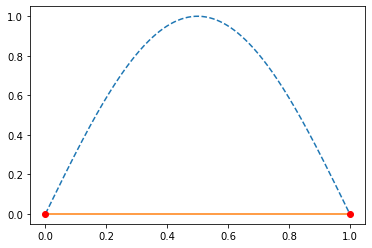

In [22]:
test_interpolation_on_sin(2, np.linspace(0, 1, 257))

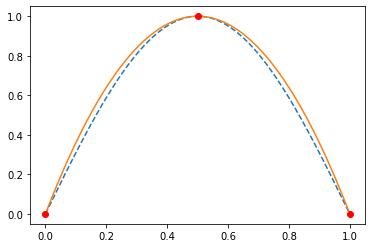

In [23]:
test_interpolation_on_sin(3, np.linspace(0, 1, 257))

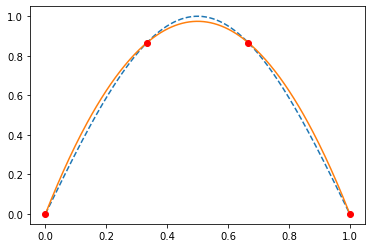

In [24]:
test_interpolation_on_sin(4, np.linspace(0, 1, 257))

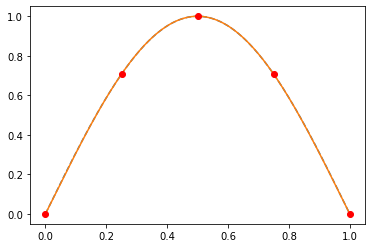

In [25]:
test_interpolation_on_sin(5, np.linspace(0, 1, 257))

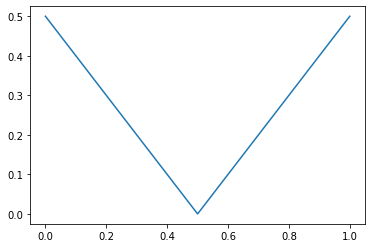

In [26]:
def f2(x):
    return np.abs(x - 0.5)

plt.plot(evaluation_points, f2(evaluation_points))

In [27]:
my_list = [1, 2, 3, 'cat']

In [28]:
my_list.append(f1)

In [29]:
my_list

[1, 2, 3, 'cat', <function __main__.f1(x)>]

In [30]:
def evaluate_on_3(f):
    return f(3)

In [31]:
evaluate_on_3(f1)

3.6739403974420594e-16

In [32]:
def evaluate_all_on_3(list_of_functions):
    return [f(3) for f in list_of_functions]

In [33]:
my_functions = [f1, f2]
evaluate_all_on_3(my_functions)

[3.6739403974420594e-16, 2.5]

In [34]:
def test_interpolation(f_test, n_nodes, x):
    operator = build_equispace_interpolator(n_nodes, x)
    f_q = f_test(operator.q)
    f_x = f_test(x)
    I_f_x = operator.M @ f_q
    plt.plot(x, f_x, linestyle='--')
    plt.plot(x, I_f_x)
    plt.plot(operator.q, f_q, linestyle='', marker='o', color='red')

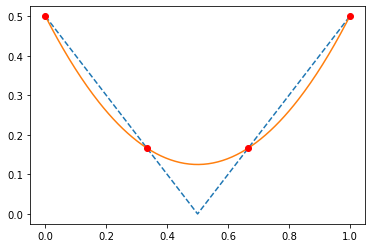

In [35]:
test_interpolation(f2, 4, np.linspace(0, 1, 257))

In [36]:
def test_interpolation(f_test, n_nodes, x=np.linspace(0, 1, 257)):
    operator = build_equispace_interpolator(n_nodes, x)
    f_q = f_test(operator.q)
    f_x = f_test(x)
    I_f_x = operator.M @ f_q
    plt.plot(x, f_x, linestyle='--')
    plt.plot(x, I_f_x)
    plt.plot(operator.q, f_q, linestyle='', marker='o', color='red')

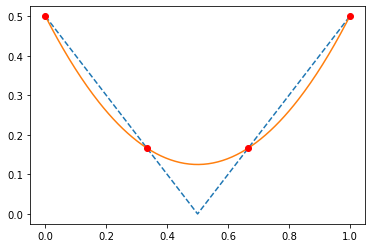

In [37]:
test_interpolation(f2, 4)

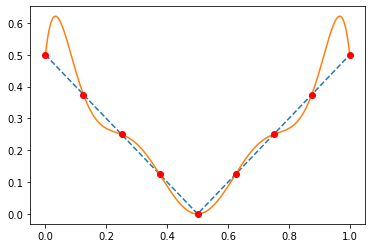

In [38]:
test_interpolation(f2, 9)

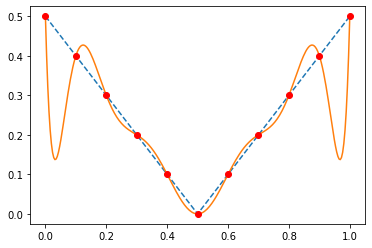

In [39]:
test_interpolation(f2, 11)

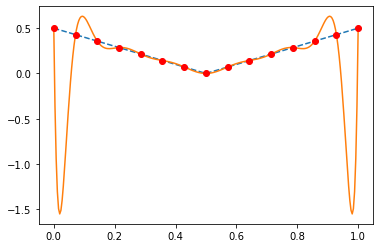

In [40]:
test_interpolation(f2, 15)

In [41]:
def convergence_plot(f_test, x=np.linspace(0, 1, 257)):
    errors = []
    trials = list(range(2, 21))
    for i in trials:
        operator = build_equispace_interpolator(i, x)
        f_q = f_test(operator.q)
        f_x = f_test(x)
        I_f_x = operator.M @ f_q
        error = np.max(np.abs(f_x - I_f_x))
        errors.append(error)
    plt.semilogy(trials, errors)


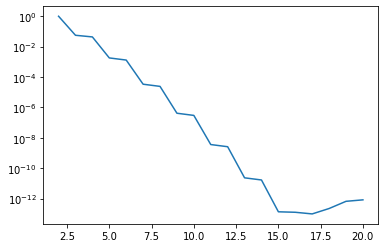

In [42]:
convergence_plot(f1)

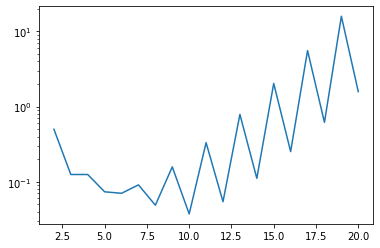

In [43]:
convergence_plot(f2)

In [44]:
def build_chebyshev_nodes(n_nodes):
    nodes_original_interval =  np.cos(
        (2 * np.arange(1, n_nodes + 1) - 1) / float(2 * n_nodes) * np.pi
    )
    return (nodes_original_interval + 1) / 2.

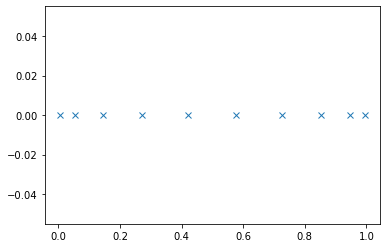

In [45]:
c_nodes = build_chebyshev_nodes(10)
plt.plot(c_nodes, np.zeros_like(c_nodes), linestyle='', marker='x')

In [46]:
def build_chebyshev_interpolator(n_nodes, x):
    q = build_chebyshev_nodes(n_nodes)
    M = build_lagrangian_basis(q, x)
    return ApproximationOperator(q, x, M)

In [47]:
def test_chebyshev_interpolator(f_test, n_nodes, x=np.linspace(0, 1, 257)):
    operator = build_chebyshev_interpolator(n_nodes, x)
    f_q = f_test(operator.q)
    f_x = f_test(x)
    I_f_x = operator.M @ f_q
    plt.plot(x, f_x, linestyle='--')
    plt.plot(x, I_f_x)
    plt.plot(operator.q, f_q, linestyle='', marker='o', color='red')

In [48]:
def convergence_plot(f_test, operator_builder, x=np.linspace(0, 1, 257)):
    errors = []
    trials = list(range(2, 21))
    for i in trials:
        operator = operator_builder(i, x)
        f_q = f_test(operator.q)
        f_x = f_test(x)
        I_f_x = operator.M @ f_q
        error = np.max(np.abs(f_x - I_f_x))
        errors.append(error)
    plt.semilogy(trials, errors)

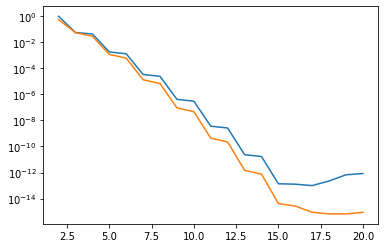

In [49]:
convergence_plot(f1, build_equispace_interpolator)
convergence_plot(f1, build_chebyshev_interpolator)

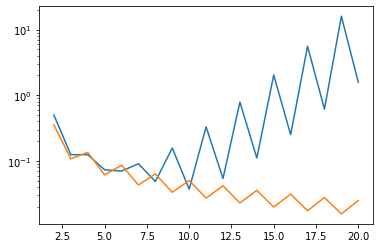

In [50]:
convergence_plot(f2, build_equispace_interpolator)
convergence_plot(f2, build_chebyshev_interpolator)

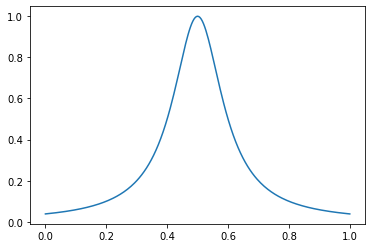

In [51]:
def f3(x):
    return 1 / (1 + 100 * (x  - .5) ** 2)

plt.plot(evaluation_points, f3(evaluation_points))

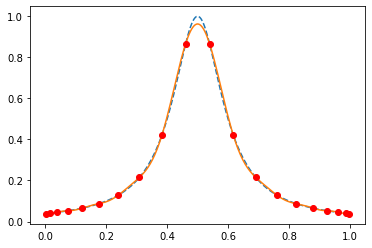

In [52]:
test_chebyshev_interpolator(f3, 20)

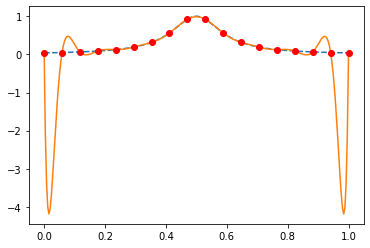

In [53]:
test_interpolation(f3, 18)

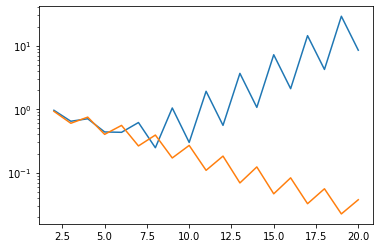

In [54]:
convergence_plot(f3, build_equispace_interpolator)
convergence_plot(f3, build_chebyshev_interpolator)

In [55]:
from scipy.special import comb

def build_berstein_operator(n_nodes, x=np.linspace(0, 1, 257)):
    n_evaluation_points = x.shape[0]
    M = np.zeros((n_evaluation_points, n_nodes))
    
    q = np.linspace(0, 1, n_nodes)
    n = n_nodes - 1
    for i in range(n_nodes):
        M[:, i] = comb(n, i) * x**i * (1 - x)**(n - i)
    
    return ApproximationOperator(q, x, M)
    

In [56]:
def test_berstein_approximation(f_test, n_nodes, x=np.linspace(0, 1, 257)):
    operator = build_berstein_operator(n_nodes, x)
    f_q = f_test(operator.q)
    f_x = f_test(x)
    I_f_x = operator.M @ f_q
    plt.plot(x, f_x, linestyle='--')
    plt.plot(x, I_f_x)
    # plt.plot(operator.q, f_q, linestyle='', marker='o', color='red')

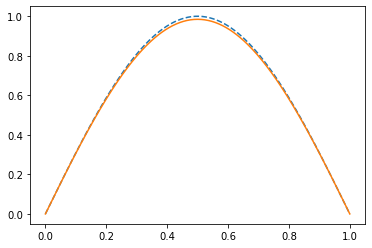

In [57]:
test_berstein_approximation(f1, 80)

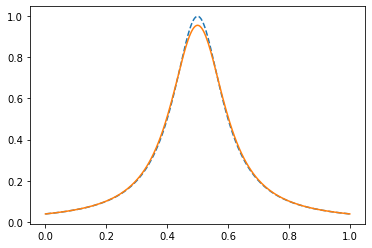

In [58]:
test_berstein_approximation(f3, 500)

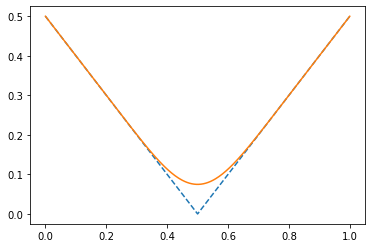

In [59]:
test_berstein_approximation(f2, 30)

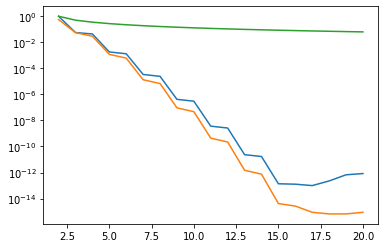

In [60]:
convergence_plot(f1, build_equispace_interpolator)
convergence_plot(f1, build_chebyshev_interpolator)
convergence_plot(f1, build_berstein_operator)

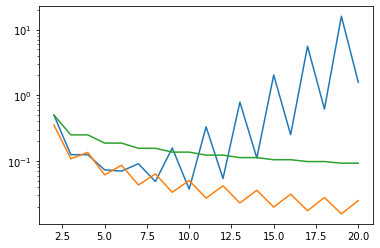

In [61]:
convergence_plot(f2, build_equispace_interpolator)
convergence_plot(f2, build_chebyshev_interpolator)
convergence_plot(f2, build_berstein_operator)

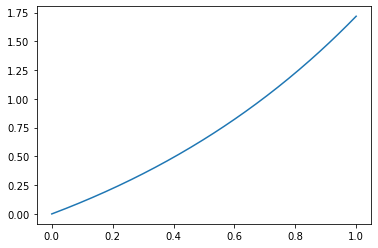

In [62]:
def f4(x):
    return np.exp(x) - 1

plt.plot(evaluation_points, f4(evaluation_points))

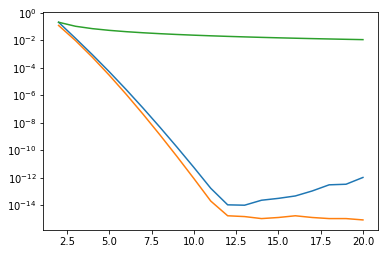

In [63]:
convergence_plot(f4, build_equispace_interpolator)
convergence_plot(f4, build_chebyshev_interpolator)
convergence_plot(f4, build_berstein_operator)

If you have any question, you can send me a mail at the following address:

    stefano.piani@sissa.it